In [1]:
pip install yfinance

     |████████████████████████████████| 63 kB 983 kB/s 
     |████████████████████████████████| 6.4 MB 10.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
# importing libraries

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
yf.pdr_override()

In [4]:
# Getting stock data for NVIDIA, AMD and INTEL
stock_list = ['NVDA', 'AMD', 'INTC']

# Defining time period for the stock
start = datetime.datetime(2021, 4, 1)
end = datetime.datetime.now()

In [5]:
for stock in stock_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = pdr.DataReader(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [44]:
NVDA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,135.722504,138.699997,135.112503,138.117493,138.021088,30827600
2021-04-05,138.675003,140.139999,137.330002,139.875000,139.777374,25567200
2021-04-06,139.997498,140.542496,137.735001,138.615005,138.518250,19174400
2021-04-07,138.807495,142.434998,137.115005,141.434998,141.336273,25128400
2021-04-08,142.527496,144.714996,142.490005,143.169998,143.070068,24441600


# EDA for NVDA and its competitors AMD & INTC

Moving forward, data analysis insights are presentaed for all the three stock data in the order NVDA, AMD and INTC

**Plotting closing prices**

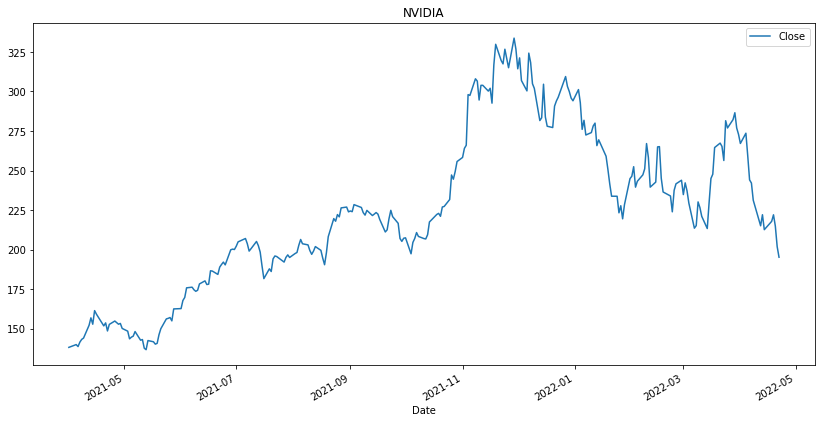

In [47]:
NVDA['Close'].plot(legend = True, figsize = (14,7))
plt.title('NVIDIA')
plt.show()

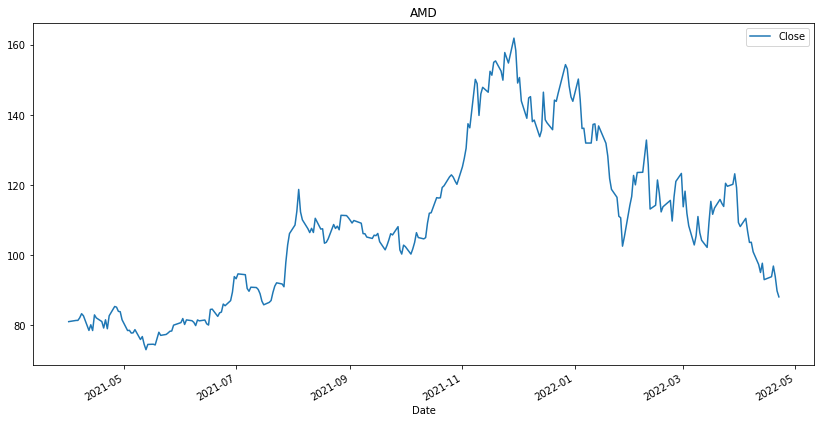

In [42]:
AMD['Close'].plot(legend = True, figsize = (14,7))
plt.title('AMD')
plt.show()

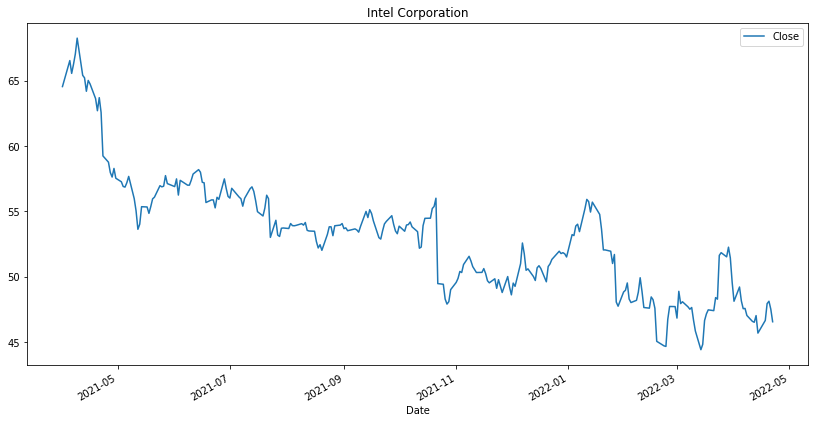

In [40]:
INTC['Close'].plot(legend = True, figsize = (14,7))
plt.title('Intel Corporation')
plt.show()

**Plotting Volume traded**

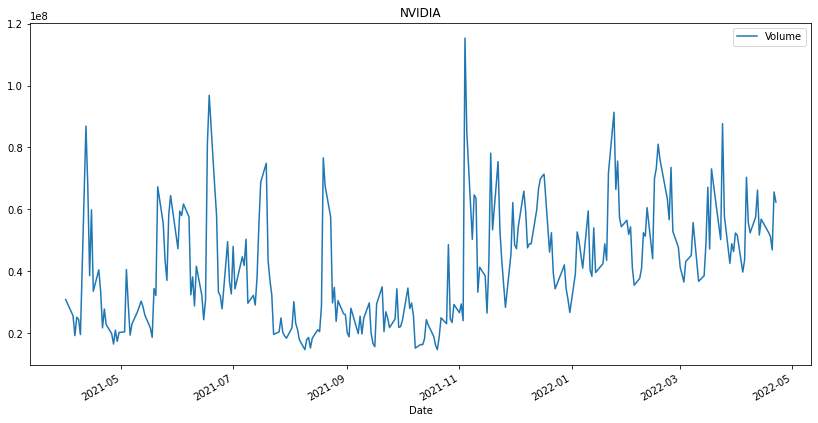

In [46]:
NVDA['Volume'].plot(legend = True, figsize = (14,7))
plt.title('NVIDIA')
plt.show()

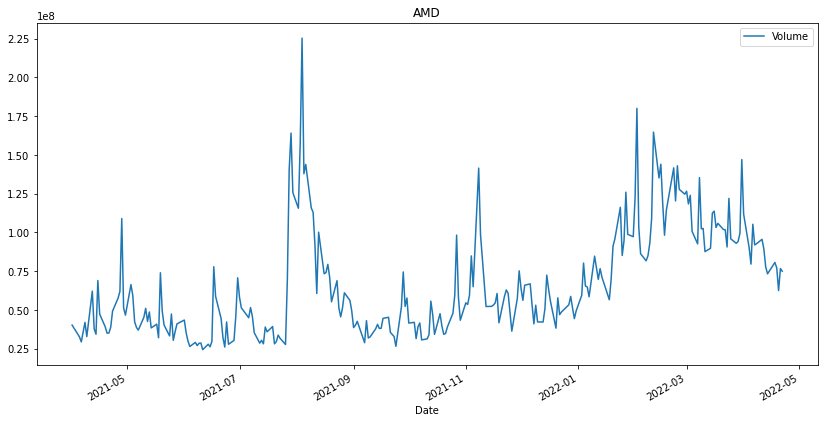

In [48]:
AMD['Volume'].plot(legend = True, figsize = (14,7))
plt.title('AMD')
plt.show()

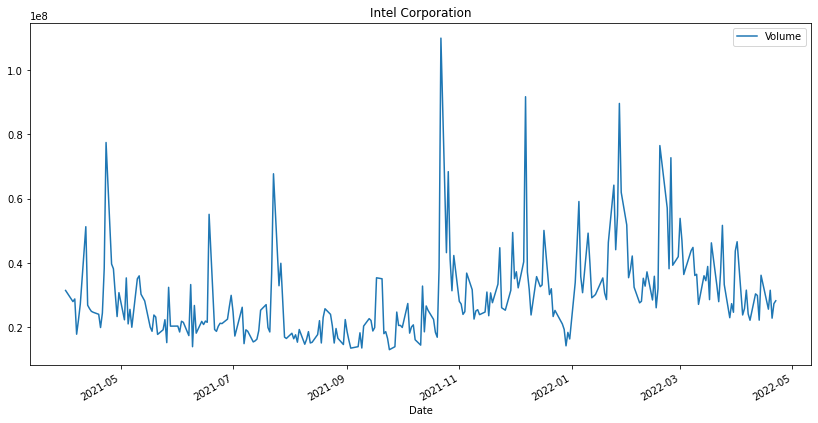

In [49]:
INTC['Volume'].plot(legend = True, figsize = (14,7))
plt.title('Intel Corporation')
plt.show()

**Moving Average**

A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

In [8]:
# Considering moving averages of 10, 20 and 50 days
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    NVDA[column_name]=pd.DataFrame.rolling(NVDA['Close'],ma).mean()

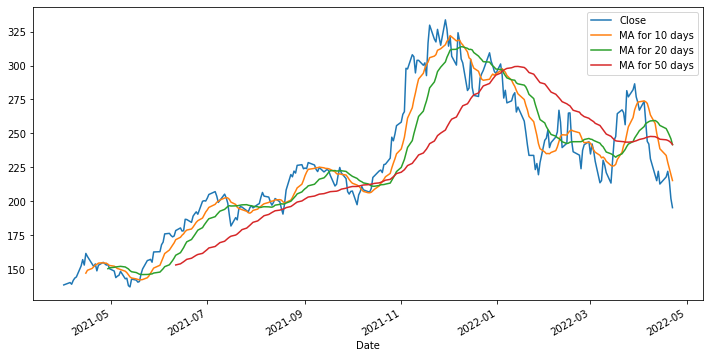

In [9]:
NVDA[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

In [10]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AMD[column_name]=pd.DataFrame.rolling(AMD['Close'],ma).mean()

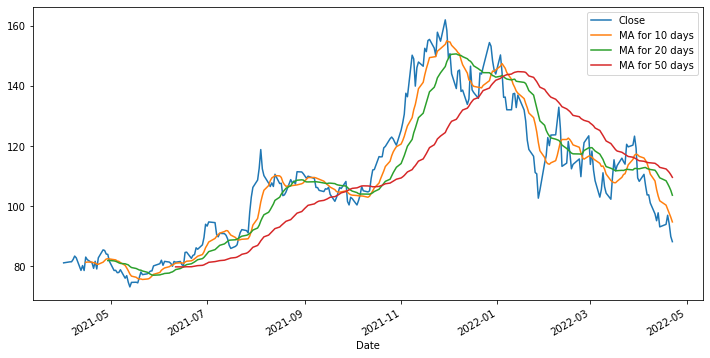

In [11]:
AMD[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

In [13]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    INTC[column_name]=pd.DataFrame.rolling(INTC['Close'],ma).mean()

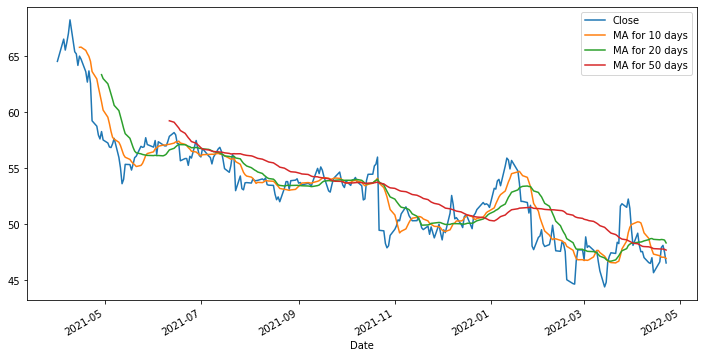

In [14]:
INTC[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

**Daily Reutrn Analysis**

Moving further, we need to analyse the risk of the stock. To do so we need to look at daily reurn of the stocks.

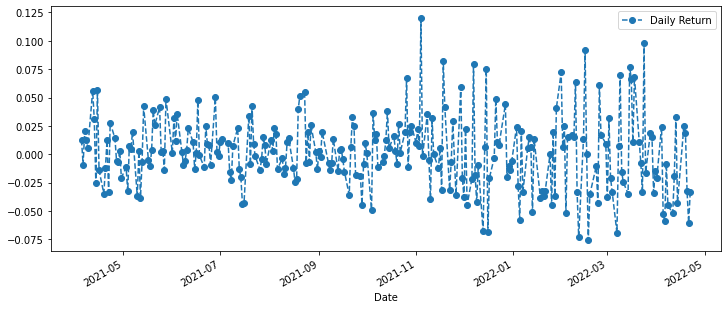

In [16]:
# using pct_change to find the percent change for each day
NVDA['Daily Return'] = NVDA['Close'].pct_change()
# plot the daily return percentage
NVDA['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

Plotting histogram and kde together to look at the average daily return.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


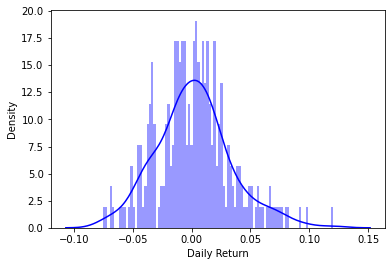

In [18]:
sns.distplot(NVDA['Daily Return'].dropna(),bins=100,color='blue')
plt.show()

Since we need to analyze daily return for each stock, thus we prepare a dataframe with 'Close' values of all the stocks.

In [8]:
closing_NVDA = pd.DataFrame(NVDA['Close'])
close1  = closing_NVDA.rename(columns={"Close": "NVDA_close"})

closing_AMD = pd.DataFrame(AMD['Close'])
close2  = closing_AMD.rename(columns={"Close": "AMD_close"})

closing_INTC = pd.DataFrame(INTC['Close'])
close3  = closing_INTC.rename(columns={"Close": "INTC_close"})

closing_df = pd.concat([close1, close2, close3], axis=1)
closing_df.head()

,NVDA_close,AMD_close,INTC_close
Date,,,
2021-04-01,138.117493,81.089996,64.550003
2021-04-05,139.875000,81.430000,66.540001
2021-04-06,138.615005,81.440002,65.559998
2021-04-07,141.434998,82.199997,66.250000
2021-04-08,143.169998,83.349998,67.050003


In [9]:
# Taking percentage change of all the closing values
daily_returns = closing_df.pct_change()

If two stocks are positively corelated then there should be a linear relationship between their daily return values

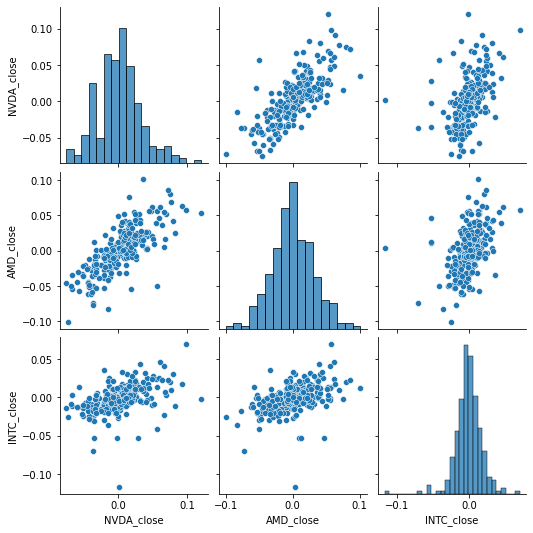

In [10]:
# Using pairplot to give visual analysis on how each stock related to one another
sns.pairplot(daily_returns.dropna())

**Risk Analysis**

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

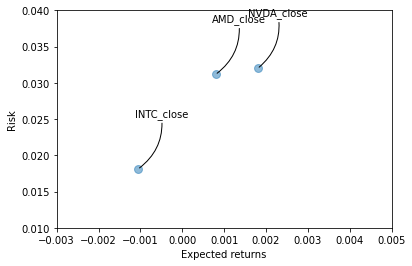

In [14]:
# Let's start by defining a new DataFrame as a cleanedd version of the original daily_returns DataFrame
returns = daily_returns.dropna()

area = np.pi*20

plt.scatter(returns.mean(), returns.std(),alpha = 0.5,s =area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Set the x and y limits of the plot
plt.ylim([0.01,0.04])
plt.xlim([-0.003,0.005])

# Label the scatter plots
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))